# Análise Acadêmica Completa de Desempenho

Este notebook executa uma análise completa e unificada sobre dados de desempenho acadêmico. O objetivo é extrair insights sobre as notas, faltas e taxas de aprovação/reprovação por disciplina.

O processo é dividido em três etapas principais:
1.  **Carregamento e Preparação dos Dados:** Leitura do arquivo `notas.csv`, limpeza, conversão de tipos e mapeamento de valores da coluna `Situação` (`AM`, `RN`, `RF`).
2.  **Execução das Análises:** Um bloco de código principal realiza 6 análises detalhadas, gerando um relatório de texto, um resumo em CSV e múltiplos gráficos.
3.  **Conclusão:** Resumo dos arquivos gerados.

**Arquivos de Saída Esperados:**
* `resultados_analise_completa.txt`: Um arquivo de texto com todos os resultados estatísticos.
* `resumo_disciplinas.csv`: Um arquivo CSV com a média e taxa de reprovação por disciplina.
* Múltiplos arquivos de imagem `.png` para cada visualização gerada.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sys

# Comando para garantir que os gráficos sejam exibidos corretamente no notebook (se necessário)
%matplotlib inline

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [6]:
# --- Etapa 1: Carregamento e Preparação dos Dados ---
try:
    df = pd.read_csv('notas.csv', encoding='utf-8-sig')
    print("Arquivo 'notas.csv' carregado com sucesso.")
except FileNotFoundError:
    print("ERRO: O arquivo 'notas.csv' não foi encontrado.")
    df = None 

if df is not None:
    # Limpeza e preparação dos dados
    df.columns = df.columns.str.strip()
    colunas_unidades = [f'Unidade {i}' for i in range(1, 6)]
    col_prova_final = 'Prova Final'
    col_faltas = 'Faltas'
    colunas_para_converter = colunas_unidades + [col_prova_final, col_faltas]
    for col in colunas_para_converter:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

    # Mapeia AM, RN e RF para os valores padrão "Aprovado" e "Reprovado"
    mapeamento_situacao = {'AM': 'Aprovado', 'RN': 'Reprovado', 'RF': 'Reprovado'}
    df['Situação'] = df['Situação'].str.strip().replace(mapeamento_situacao)
    
    # Engenharia de Variáveis
    unidades_existentes = [col for col in colunas_unidades if col in df.columns]
    df['Media_Unidades'] = df[unidades_existentes].mean(axis=1)
    df['Nota_Final_Calculada'] = (df['Media_Unidades'] + df[col_prova_final]) / 2
    df['Nota_Final_Calculada'].fillna(df['Media_Unidades'], inplace=True)
    
    print("Mapeamento da coluna 'Situação' e preparação dos dados concluídos.")
    
    # Exibe as primeiras linhas e informações do DataFrame para verificação
    print("\nPré-visualização dos dados:")
    display(df.head())
    print("\nInformações do DataFrame:")
    df.info()

Arquivo 'notas.csv' carregado com sucesso.
Mapeamento da coluna 'Situação' e preparação dos dados concluídos.

Pré-visualização dos dados:


C:\Users\Geraldo\AppData\Local\Temp\ipykernel_3912\2719372707.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nota_Final_Calculada'].fillna(df['Media_Unidades'], inplace=True)


,AlunoID,Código,Disciplina,Unidade 1,Unidade 2,Unidade 3,Unidade 4,Unidade 5,Prova Final,Resultado,Faltas,Situação,Media_Unidades,Nota_Final_Calculada
0,1,DC/CCN061,PROCESSAMENTO DE LINGUAGEM NATURAL,7.1,9.4,10.0,NaN,NaN,NaN,"8,8",10,Aprovado,8.833333,8.833333
1,1,DC/CCN040,SEGURANÇA EM SISTEMAS,9.3,8.5,8.1,NaN,NaN,NaN,"8,6",14,Aprovado,8.633333,8.633333
2,1,DC/CCN038,SISTEMAS DISTRIBUÍDOS,8.0,10.0,9.0,NaN,NaN,NaN,"9,0",14,Aprovado,9.000000,9.000000
3,1,DC/CCN071,TÓPICOS EM ENGENHARIA DE SOFTWARE,9.4,9.0,7.5,NaN,NaN,NaN,"8,6",12,Aprovado,8.633333,8.633333
4,1,DC/CCN032,COMPUTAÇÃO GRÁFICA,8.0,7.0,10.0,NaN,NaN,NaN,"8,3",10,Aprovado,8.333333,8.333333



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AlunoID               1332 non-null   int64  
 1   Código                1332 non-null   object 
 2   Disciplina            1332 non-null   object 
 3   Unidade 1             1332 non-null   float64
 4   Unidade 2             1315 non-null   float64
 5   Unidade 3             1315 non-null   float64
 6   Unidade 4             16 non-null     float64
 7   Unidade 5             16 non-null     float64
 8   Prova Final           308 non-null    float64
 9   Resultado             1332 non-null   object 
 10  Faltas                1332 non-null   int64  
 11  Situação              1332 non-null   object 
 12  Media_Unidades        1332 non-null   float64
 13  Nota_Final_Calculada  1332 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usa

## 2. Análise Completa e Geração de Arquivos

A célula a seguir contém o núcleo da análise. Ela foi projetada para executar todas as 6 análises em lote e salvar os resultados em arquivos externos, em vez de exibi-los diretamente no notebook.

- **Relatório de Texto:** `resultados_analise_completa.txt`
- **Resumo em CSV:** `resumo_disciplinas.csv`
- **Gráficos:** Vários arquivos `.png`

A saída desta célula mostrará apenas as mensagens de progresso.

Gerando gráficos (eles aparecerão abaixo desta mensagem)...


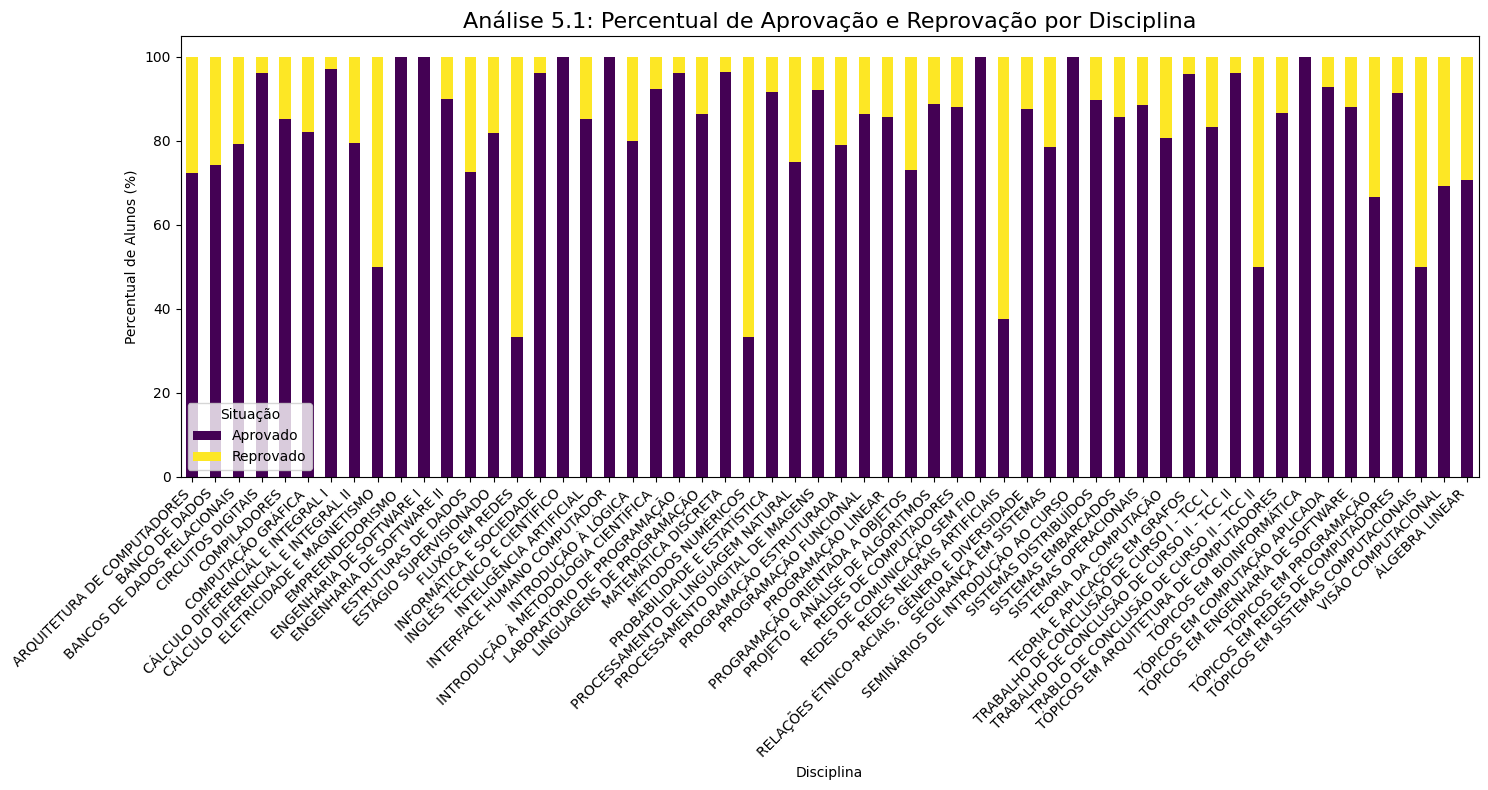

C:\Users\Geraldo\AppData\Local\Temp\ipykernel_3912\3188777722.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_reprovacao['Taxa_Reprovacao_Perc'], y=ranking_reprovacao.index, palette='Reds_r')


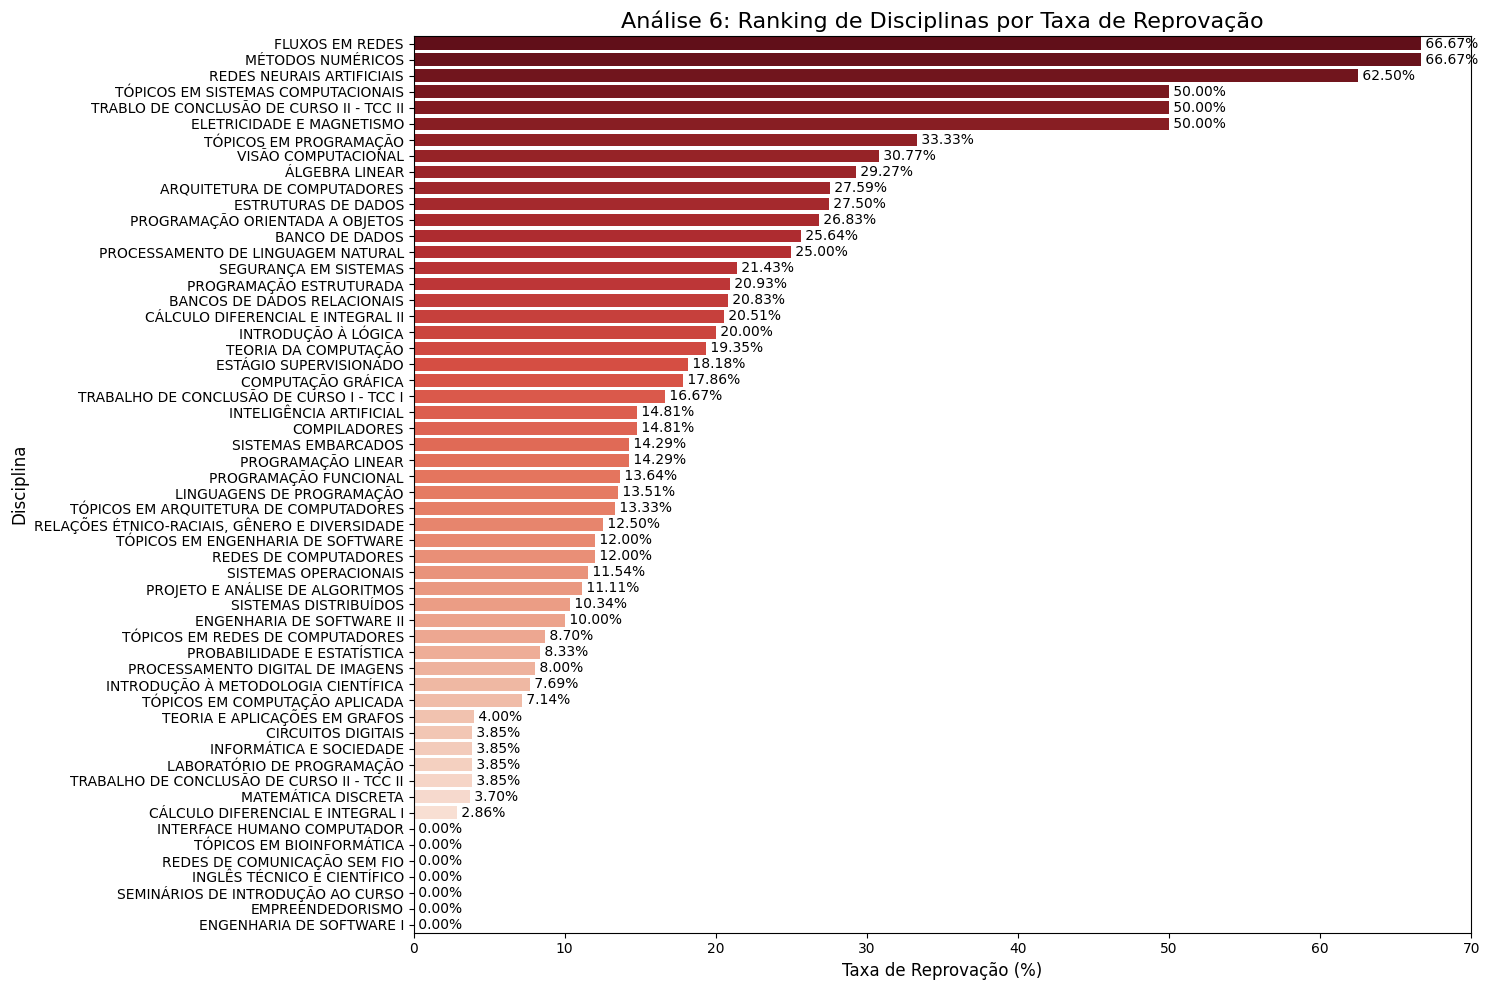


Análise completa finalizada.


In [7]:
if df is not None:
    # --- Redirecionamento da Saída de TEXTO para Arquivo ---
    original_stdout = sys.stdout
    with open('resultados_analise_completa.txt', 'w', encoding='utf-8') as f:
        sys.stdout = f # Redireciona a saída de texto
        
        print("="*50 + "\n--- RESULTADOS DA ANÁLISE ACADÊMICA COMPLETA ---\n" + "="*50 + "\n")

        # Análise 1: Nota Final vs. Disciplina
        print("Análise 1: Nota Final por Disciplina\n" + "-"*35)
        # (O código para a análise de texto permanece o mesmo...)
        disciplinas = df['Disciplina'].unique()
        if len(disciplinas) > 1:
            samples = [df['Nota_Final_Calculada'][df['Disciplina'] == d].dropna() for d in disciplinas if not df['Nota_Final_Calculada'][df['Disciplina'] == d].dropna().empty]
            if len(samples) > 1:
                f_val, p_val = stats.f_oneway(*samples)
                print(f" -> Teste ANOVA: F-value = {f_val:.2f}, p-value = {p_val:.4f}")
                if p_val < 0.05:
                    print(" -> Insight: Há uma diferença estatisticamente significativa nas médias de notas entre as disciplinas.\n")
                else:
                    print(" -> Insight: Não há uma diferença estatisticamente significativa nas médias de notas entre as disciplinas.\n")
        
        # ... (Todas as outras análises de texto seguem aqui) ...
        # Análise 2
        print("Análise 2: Relação entre Média das Unidades e Prova Final\n" + "-"*35)
        correlacoes_unidades = df.groupby('Disciplina')[['Media_Unidades', col_prova_final]].corr(numeric_only=True).unstack().iloc[:, 1]
        print(" -> Coeficiente de Correlação (Pearson):\n" + correlacoes_unidades.to_string())
        print("\n -> Insight: Valores positivos altos indicam que o desempenho ao longo do semestre é um bom preditor da nota na prova final.\n")

        # Análise 3
        print("Análise 3: Relação entre Faltas e a Situação Final\n" + "-"*35)
        faltas_aprovados = df[df['Situação'] == 'Aprovado'][col_faltas].dropna()
        faltas_reprovados = df[df['Situação'] == 'Reprovado'][col_faltas].dropna()
        if len(faltas_aprovados) > 1 and len(faltas_reprovados) > 1:
            print(f" -> Média de Faltas (Grupo Aprovado): {faltas_aprovados.mean():.2f}")
            print(f" -> Média de Faltas (Grupo Reprovado): {faltas_reprovados.mean():.2f}")
            t_stat, p_val_ttest = stats.ttest_ind(faltas_aprovados, faltas_reprovados, equal_var=False)
            print(f" -> Teste T: t-statistic = {t_stat:.2f}, p-value = {p_val_ttest:.4f}")
            if p_val_ttest < 0.05:
                print(" -> Insight: A diferença na média de faltas entre os grupos Aprovado e Reprovado é estatisticamente significativa.\n")
            else:
                print(" -> Insight: Não há uma diferença estatisticamente significativa na média de faltas entre os grupos.\n")
        else:
            print(" -> Análise não executada: dados insuficientes para os grupos 'Aprovado' e 'Reprovado'.\n")
        
        # Análise 4
        print("Análise 4: Relação entre Faltas e Notas Finais\n" + "-"*35)
        correlacoes_faltas = df.groupby('Disciplina')[[col_faltas, 'Nota_Final_Calculada']].corr(numeric_only=True).unstack().iloc[:, 1]
        print(" -> Coeficiente de Correlação (Pearson):\n" + correlacoes_faltas.to_string())
        print("\n -> Insight: Valores negativos indicam que um maior número de faltas está associado a notas finais menores.\n")

        # Análise 5
        print("Análise 5: Análise de Aprovação e Reprovação\n" + "="*45)
        crosstab_situacao = pd.crosstab(df['Disciplina'], df['Situação'], normalize='index') * 100
        media_notas_situacao = df.groupby('Situação')['Nota_Final_Calculada'].describe()
        print("\n5.1: Percentual de Sucesso por Disciplina (%)\n" + "-"*35)
        print(crosstab_situacao.round(2))
        print("\n5.2: Comparativo de Notas: Aprovados vs. Reprovados\n" + "-"*35)
        print(media_notas_situacao.round(2))
        
        print("\n5.3: Criação do Resumo por Disciplina\n" + "-"*35)
        resumo_disciplinas = df.groupby('Disciplina').agg(Media_Geral_Turma=('Nota_Final_Calculada', 'mean'), Total_Alunos=('AlunoID', 'count'))
        reprovados_por_disciplina = df[df['Situação'] == 'Reprovado'].groupby('Disciplina').agg(Total_Reprovados=('AlunoID', 'count'))
        resumo_disciplinas = resumo_disciplinas.join(reprovados_por_disciplina).fillna(0)
        resumo_disciplinas['Taxa_Reprovacao_Perc'] = (resumo_disciplinas['Total_Reprovados'] / resumo_disciplinas['Total_Alunos']) * 100
        resumo_disciplinas.round(2).to_csv('resumo_disciplinas.csv', encoding='utf-8-sig')
        print(" -> O arquivo 'resumo_disciplinas.csv' foi criado com a taxa de reprovação de cada disciplina.\n")

        # Análise 6
        print("Análise 6: Ranking de Disciplinas por Taxa de Reprovação\n" + "="*45)
        ranking_reprovacao = resumo_disciplinas.sort_values(by='Taxa_Reprovacao_Perc', ascending=False)
        print("Disciplinas com as maiores taxas de reprovação (%):\n" + "-"*35)
        print(ranking_reprovacao['Taxa_Reprovacao_Perc'].to_string(float_format="%.2f%%"))
        print("\n -> Insight: Este ranking ajuda a priorizar ações pedagógicas nas disciplinas mais críticas.\n")


    # Restaura a saída padrão para o terminal
    sys.stdout = original_stdout

    # --- Geração de todos os Gráficos ---
    # Agora os gráficos serão exibidos inline porque REMOVEMOS plt.close()
    
    print("Gerando gráficos (eles aparecerão abaixo desta mensagem)...")
    

    # Gráfico 5.1
    if 'crosstab_situacao' in locals() and not crosstab_situacao.empty:
        crosstab_situacao.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
        plt.title('Análise 5.1: Percentual de Aprovação e Reprovação por Disciplina', fontsize=16)
        plt.ylabel('Percentual de Alunos (%)'); plt.xlabel('Disciplina')
        plt.xticks(rotation=45, ha='right'); plt.legend(title='Situação')
        plt.tight_layout()
        plt.savefig('analise_5_perc_aprovacao.png')
        plt.show()
    
    # Gráfico 6
    if 'ranking_reprovacao' in locals() and not ranking_reprovacao.empty:
        plt.figure(figsize=(15, 10))
        sns.barplot(x=ranking_reprovacao['Taxa_Reprovacao_Perc'], y=ranking_reprovacao.index, palette='Reds_r')
        plt.title('Análise 6: Ranking de Disciplinas por Taxa de Reprovação', fontsize=16)
        plt.xlabel('Taxa de Reprovação (%)', fontsize=12); plt.ylabel('Disciplina', fontsize=12)
        for index, value in enumerate(ranking_reprovacao['Taxa_Reprovacao_Perc']): plt.text(value, index, f' {value:.2f}%', va='center')
        plt.tight_layout()
        plt.savefig('analise_6_ranking_reprovacao.png')
        plt.show()

    print("\nAnálise completa finalizada.")
else:
    print("O DataFrame não foi carregado. A análise não pode continuar.")